# The minimum jerk hypothesis

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br)  
> Federal University of ABC, Brazil

<center><div style="background-color:#f2f2f2;border:1px solid black;width:72%;padding:5px 10px 5px 10px;text-align:left;">
<i>"Whatever its physiological underpinnings, the real strength of the minimum-jerk criterion function, or indeed any other criterion function, is its use as an organizing principle. The use of variational principles is common in physics and engineering. They are not presented as the cause of the behavior they describe but rather as a distillation of its essence."</i> &nbsp; <b>Hogan</b> (1984)</div></center>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Development" data-toc-modified-id="Development-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Development</a></span></li><li><span><a href="#Finding-the-minimum-jerk-trajectory" data-toc-modified-id="Finding-the-minimum-jerk-trajectory-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding the minimum jerk trajectory</a></span></li><li><span><a href="#The-angular-trajectory-of-a-minimum-jerk-trajectory" data-toc-modified-id="The-angular-trajectory-of-a-minimum-jerk-trajectory-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The angular trajectory of a minimum jerk trajectory</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Python setup

In [1]:
# import necessary libraries and configure environment
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math
from sympy import symbols, Matrix, latex, Eq, collect, solve, diff, simplify, init_printing
from sympy.core import S
from sympy.utilities.lambdify import lambdify
init_printing() 
sns.set_context('notebook', rc={"lines.linewidth": 2})

## Development

Hogan and Flash (1984, 1985), based on observations of voluntary movements in primates, suggested that movements are performed (organized) with the smoothest trajectory possible. In this organizing principle, the endpoint trajectory is such that the mean squared-jerk across time of this movement is minimum.   

Jerk is the derivative of acceleration and the observation of the minimum-jerk trajectory is for the endpoint in the extracorporal coordinates (not for joint angles) and according to Flash and Hogan (1985), the minimum-jerk trajectory of a planar movement is such that minimizes the following objective function:

\begin{equation}
\begin{array}{rcl}
C = \frac{1}{2} \displaystyle\int\limits_{t_{i}}^{t_{f}}\;\left[\left(\dfrac{d^{3}x}{dt^{3}}\right)^2+\left(\dfrac{d^{3}y}{dt^{3}}\right)^2\right]\;\mathrm{d}t
\label{}
\end{array}
\end{equation}

Hogan (1984) found that the solution for this objective function is a fifth-order polynomial trajectory (see Shadmehr and Wise (2004) for a simpler proof): 

\begin{equation}
\begin{array}{l l}
x(t) = a_0+a_1t+a_2t^2+a_3t^3+a_4t^4+a_5t^5 \\
y(t) = b_0+b_1t+b_2t^2+b_3t^3+b_4t^4+b_5t^5
\label{}
\end{array}
\end{equation}

With the following boundary conditions for $ x(t) $ and $ y(t) $: initial and final positions are $ (x_i,y_i) $ and $ (x_f,y_f) $ and initial and final velocities and accelerations are zero.

## Finding the minimum jerk trajectory

Let's employ [Sympy](http://sympy.org/en/index.html) to find the solution for the minimum jerk trajectory using symbolic algebra.  
The equation for minimum jerk trajectory for x is:

In [2]:
# symbolic variables
x, xi, xf, y, yi, yf, d, t = symbols('x, x_i, x_f, y, y_i, y_f, d, t')
a0, a1, a2, a3, a4, a5 = symbols('a_0:6')
x = a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5
display(Eq(S('x(t)'), x))

                       2       3       4       5
x(t) = a₀ + a₁⋅t + a₂⋅t  + a₃⋅t  + a₄⋅t  + a₅⋅t 

Without loss of generality, consider $ t_i=0 $ and let's use $ d $ for movement duration ($ d=t_f $).  
The system of equations with the boundary conditions for $ x $ is:

In [3]:
# define the system of equations
s = [Eq(x.subs(t, 0), xi),
     Eq(diff(x, t, 1).subs(t, 0),  0),
     Eq(diff(x, t, 2).subs(t, 0),  0),
     Eq(x.subs(t, d), xf),
     Eq(diff(x, t, 1).subs(t, d),  0),
     Eq(diff(x, t, 2).subs(t, d),  0)]
[display(si) for si in s];

a₀ = xᵢ

a₁ = 0

2⋅a₂ = 0

                2       3       4       5      
a₀ + a₁⋅d + a₂⋅d  + a₃⋅d  + a₄⋅d  + a₅⋅d  = x_f

                    2         3         4    
a₁ + 2⋅a₂⋅d + 3⋅a₃⋅d  + 4⋅a₄⋅d  + 5⋅a₅⋅d  = 0

                       2          3    
2⋅a₂ + 6⋅a₃⋅d + 12⋅a₄⋅d  + 20⋅a₅⋅d  = 0

Which gives the following solution:

In [4]:
# algebraically solve the system of equations
sol = solve(s, [a0, a1, a2, a3, a4, a5])
display(sol)

⎧                          10⋅x_f - 10⋅xᵢ      -15⋅x_f + 15⋅xᵢ      6⋅x_f - 6⋅xᵢ⎫
⎪a₀: xᵢ, a₁: 0, a₂: 0, a₃: ──────────────, a₄: ───────────────, a₅: ────────────⎪
⎨                                 3                    4                  5     ⎬
⎪                                d                    d                  d      ⎪
⎩                                                                               ⎭

Substituting this solution in the fifth order polynomial trajectory equation, we have the actual displacement trajectories:

In [5]:
# substitute the equation parameters by the solution
x2 = x.subs(sol)
x2 = collect(simplify(x2, ratio=1), xf-xi)
display(Eq(S('x(t)'), x2))
y2 = x2.subs([(xi, yi), (xf, yf)])
display(Eq(S('y(t)'), y2))

        5                 ⎛    2  3         4      5⎞
       d ⋅xᵢ + (x_f - xᵢ)⋅⎝10⋅d ⋅t  - 15⋅d⋅t  + 6⋅t ⎠
x(t) = ──────────────────────────────────────────────
                              5                      
                             d                       

        5                 ⎛    2  3         4      5⎞
       d ⋅yᵢ + (y_f - yᵢ)⋅⎝10⋅d ⋅t  - 15⋅d⋅t  + 6⋅t ⎠
y(t) = ──────────────────────────────────────────────
                              5                      
                             d                       

And for the velocity, acceleration, and jerk trajectories in x:

In [6]:
# symbolic differentiation
vx = x2.diff(t, 1)
display(Eq(S('v_x(t)'), vx))
ax = x2.diff(t, 2)
display(Eq(S('a_x(t)'), ax))
jx = x2.diff(t, 3)
display(Eq(S('j_x(t)'), jx))

                   ⎛    2  2         3       4⎞
        (x_f - xᵢ)⋅⎝30⋅d ⋅t  - 60⋅d⋅t  + 30⋅t ⎠
vₓ(t) = ───────────────────────────────────────
                            5                  
                           d                   

                        ⎛ 2              2⎞
        60⋅t⋅(x_f - xᵢ)⋅⎝d  - 3⋅d⋅t + 2⋅t ⎠
aₓ(t) = ───────────────────────────────────
                          5                
                         d                 

                      ⎛ 2              2⎞
        60⋅(x_f - xᵢ)⋅⎝d  - 6⋅d⋅t + 6⋅t ⎠
jₓ(t) = ─────────────────────────────────
                         5               
                        d                

Let's plot the minimum jerk trajectory for x and its velocity, acceleration, and jerk considering $x_i=0,x_f=1,d=1$:

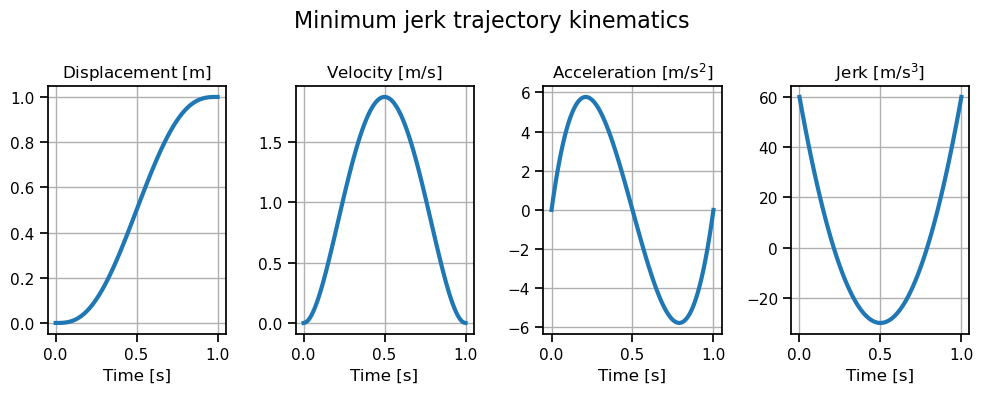

In [7]:
# substitute by the numerical values
x3  = x2.subs([(xi, 0), (xf, 1), (d, 1)])
#create functions for calculation of numerical values
xfu = lambdify(t, diff(x3, t, 0), 'numpy')
vfu = lambdify(t, diff(x3, t, 1), 'numpy')
afu = lambdify(t, diff(x3, t, 2), 'numpy')
jfu = lambdify(t, diff(x3, t, 3), 'numpy')
#plots using matplotlib
ts = np.arange(0, 1.01, .01)
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharex=True)
axs[0].plot(ts, xfu(ts), linewidth=3)
axs[0].set_title('Displacement [$\mathrm{m}$]')
axs[1].plot(ts, vfu(ts), linewidth=3)
axs[1].set_title('Velocity [$\mathrm{m/s}$]')
axs[2].plot(ts, afu(ts), linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{m/s^2}$]')
axs[3].plot(ts, jfu(ts), linewidth=3)
axs[3].set_title('Jerk [$\mathrm{m/s^3}$]')

for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=12)
    axi.grid(True)

fig.suptitle('Minimum jerk trajectory kinematics', fontsize=16)
fig.tight_layout()
plt.show()

Note that for the minimum jerk trajectory, initial and final values of both velocity and acceleration are zero, but not for the jerk.  

Read more about the minimum jerk trajectory hypothesis in the [Shadmehr and Wise's book companion site](https://storage.googleapis.com/wzukusers/user-31382847/documents/5a7253343814f4Iv6Hnt/minimumjerk.pdf) and in [Paul Gribble's website](https://gribblelab.org/teaching/compneuro2012/4_Computational_Motor_Control_Kinematics.html#orgheadline12).

## The angular trajectory of a minimum jerk trajectory 

Let's calculate the resulting angular trajectory given a minimum jerk linear trajectory, supposing it is from a circular motion of an elbow flexion. The length of the forearm is 0.5 m, the movement duration is 1 s, the elbow starts flexed at 90$^o$ and the flexes to 180$^o$.

First, the linear trajectories for this circular motion:

In [8]:
# substitute by the numerical values
x3 = x2.subs([(xi, 0.5), (xf, 0), (d, 1)])
y3 = x2.subs([(xi, 0), (xf, 0.5), (d, 1)])
display(Eq(S('y(t)'), x3))
display(Eq(S('x(t)'), y3))
#create functions for calculation of numerical values
xfux = lambdify(t, diff(x3, t, 0), 'numpy')
vfux = lambdify(t, diff(x3, t, 1), 'numpy')
afux = lambdify(t, diff(x3, t, 2), 'numpy')
jfux = lambdify(t, diff(x3, t, 3), 'numpy')
xfuy = lambdify(t, diff(y3, t, 0), 'numpy')
vfuy = lambdify(t, diff(y3, t, 1), 'numpy')
afuy = lambdify(t, diff(y3, t, 2), 'numpy')
jfuy = lambdify(t, diff(y3, t, 3), 'numpy')

              5        4        3      
y(t) = - 3.0⋅t  + 7.5⋅t  - 5.0⋅t  + 0.5

            5        4        3
x(t) = 3.0⋅t  - 7.5⋅t  + 5.0⋅t 

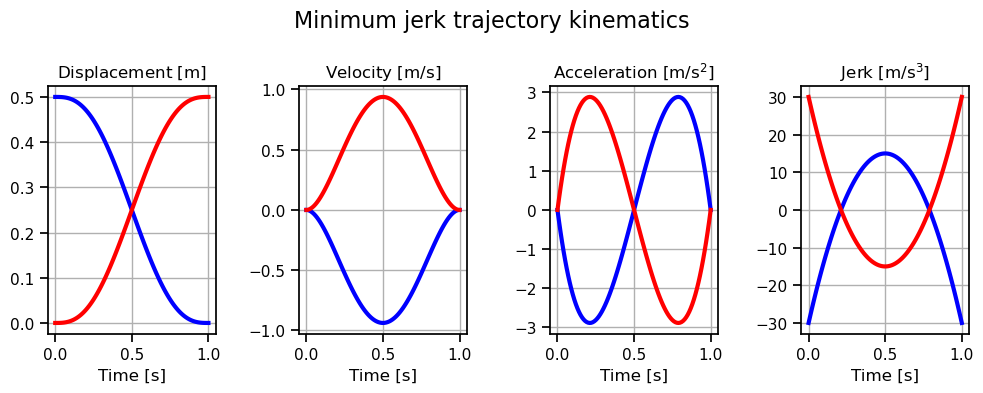

In [9]:
#plots using matplotlib
ts = np.arange(0, 1.01, .01)
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharex=True)
axs[0].plot(ts, xfux(ts), 'b', linewidth=3)
axs[0].plot(ts, xfuy(ts), 'r', linewidth=3)
axs[0].set_title('Displacement [$\mathrm{m}$]')
axs[1].plot(ts, vfux(ts), 'b', linewidth=3)
axs[1].plot(ts, vfuy(ts), 'r', linewidth=3)
axs[1].set_title('Velocity [$\mathrm{m/s}$]')
axs[2].plot(ts, afux(ts), 'b', linewidth=3)
axs[2].plot(ts, afuy(ts), 'r', linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{m/s^2}$]')
axs[3].plot(ts, jfux(ts), 'b', linewidth=3)
axs[3].plot(ts, jfuy(ts), 'r', linewidth=3)
axs[3].set_title('Jerk [$\mathrm{m/s^3}$]')

for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=12)
    axi.grid(True)

fig.suptitle('Minimum jerk trajectory kinematics', fontsize=16)
fig.tight_layout()
plt.show()

Now, the angular trajectories for this circular motion:

In [10]:
from sympy import atan2, pi
ang = atan2(y3, x3)*180/pi
display(Eq(S('angle(t)'), ang))
xang = lambdify(t, diff(ang, t, 0), 'numpy')
vang = lambdify(t, diff(ang, t, 1), 'numpy')
aang = lambdify(t, diff(ang, t, 2), 'numpy')
jang = lambdify(t, diff(ang, t, 3), 'numpy')

                    ⎛     5        4        3         5        4        3      ⎞
           180⋅atan2⎝3.0⋅t  - 7.5⋅t  + 5.0⋅t , - 3.0⋅t  + 7.5⋅t  - 5.0⋅t  + 0.5⎠
angle(t) = ─────────────────────────────────────────────────────────────────────
                                             π                                  

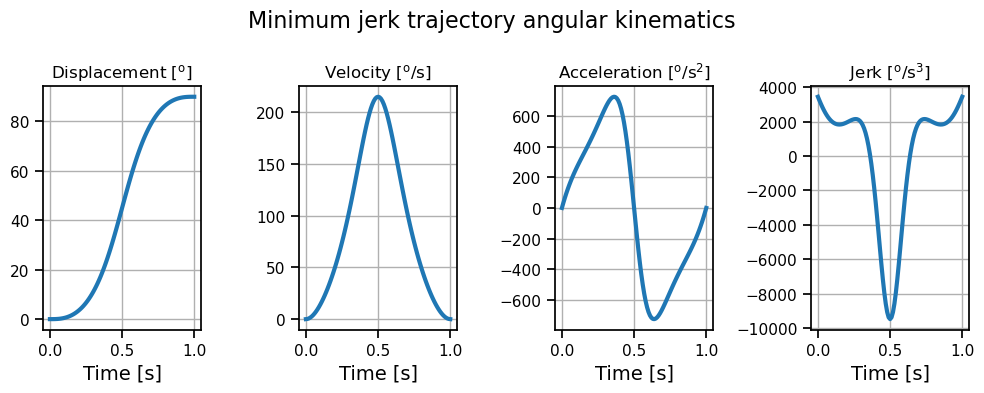

In [11]:
ts = np.arange(0, 1.01, .01)
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharex=True)
axs[0].plot(ts, xang(ts), linewidth=3)
axs[0].set_title('Displacement [$\mathrm{^o}$]')
axs[1].plot(ts, vang(ts), linewidth=3)
axs[1].set_title('Velocity [$\mathrm{^o/s}$]')
axs[2].plot(ts, aang(ts), linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{^o/s^2}$]')
axs[3].plot(ts, jang(ts), linewidth=3)
axs[3].set_title('Jerk [$\mathrm{^o/s^3}$]')

for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=14)
    axi.grid(True)

fig.suptitle('Minimum jerk trajectory angular kinematics', fontsize=16)
fig.tight_layout()
plt.show()

## Problems

1. What is your opinion on the the minimum jerk hypothesis? Do you think humans control movement based on this principle? (Think about what biomechanical and neurophysiological properties are not considered on this hypothesis.)
2. Calculate and plot the position, velocity, acceleration, and jerk trajectories for different movement speeds (for example, consider always a displacement of 1 m and movement durations of 0.5, 1, and 2 s).  
3. For the data in the previous item, calculate the ratio peak speed to average speed. Shadmehr and  Wise (2004) argue that psychophysical experiments show that reaching movements with the hand have this ratio equals to 1.75. Compare with the calculated values.  
4. Can you propose alternative hypotheses for the control of movement?  

## References

- Flash T, Hogan N (1985) [The coordination of arm movements: an experimentally confirmed mathematical model](http://www.jneurosci.org/cgi/reprint/5/7/1688.pdf). Journal of Neuroscience, 5, 1688-1703.   
- Hogan N (1984) [An organizing principle for a class of voluntary movements](http://www.jneurosci.org/content/4/11/2745.full.pdf). Journal of Neuroscience, 4, 2745-2754.
- Shadmehr R, Wise S (2004) [The Computational Neurobiology of Reaching and Pointing: A Foundation for Motor Learning](https://books.google.com.br/books?id=fKeImql1s_sC&pg=PP1&ots=WuEHfPo6G4&dq=shadmehr&sig=UjsmHL92SidKEKzgvpe5Qu_9pIs&redir_esc=y#v=onepage&q=shadmehr&f=false). A Bradford Book. [Supplementary documents](https://www.shadmehrlab.org/publications).
- Zatsiorsky VM (1998) [Kinematics of Human Motion](http://books.google.com.br/books/about/Kinematics_of_Human_Motion.html?id=Pql_xXdbrMcC&redir_esc=y). Champaign, Human Kinetics.